# Imports

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras_metrics
from keras import layers
from keras import models
from keras import optimizers
from keras import models
from keras import layers
import keras_metrics
from sklearn.model_selection import RandomizedSearchCV 

np.random.seed(123)

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

!{sys.executable} -m pip install opencv-python

import time
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.metrics import roc_curve#, plot_roc_curve

np.random.seed(123)

import pandas as pd
import numpy as np
import pickle
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.pipeline import make_pipeline

import warnings
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.metrics import roc_curve#, plot_roc_curve


In [23]:
#from DenseNet import densenet_model
from densenet_pytorch import DenseNet 

In [7]:
test_folder = 'Data/test'
train_folder = 'data/train'
val_folder = 'data/val'

In [8]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64,64), batch_size = 627) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64,64), batch_size = 19)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64,64), batch_size=5219)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [9]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [10]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [11]:
train_img.shape

(5216, 12288)

# Model A

In [60]:
modelA = models.Sequential()

modelA.add(layers.Conv2D(6, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
modelA.add(layers.MaxPooling2D((3, 3), strides=3))
modelA.add(layers.Dropout(0.45))  

modelA.add(layers.Conv2D(12, (3, 3), activation='relu'))
modelA.add(layers.MaxPooling2D((3, 3), strides=3))
modelA.add(layers.Dropout(0.05))  


modelA.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
modelA.add(layers.Dense(1, activation='sigmoid'))

In [76]:
modelA.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras_metrics.recall()])

historyA = modelA.fit(train_images,
                    train_y,
                    epochs=6,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=1)

Train on 5216 samples, validate on 16 samples
Epoch 1/5
5216/5216 [==============================] - 5s 1ms/step - loss: 0.1281 - acc: 0.9498 - recall: 0.9001 - val_loss: 0.4180 - val_acc: 0.7500 - val_recall: 0.6250
Epoch 2/5
5216/5216 [==============================] - 5s 1ms/step - loss: 0.1333 - acc: 0.9500 - recall: 0.9031 - val_loss: 0.4816 - val_acc: 0.6250 - val_recall: 0.3750
Epoch 3/5
5216/5216 [==============================] - 6s 1ms/step - loss: 0.1281 - acc: 0.9496 - recall: 0.8986 - val_loss: 0.3863 - val_acc: 0.8125 - val_recall: 0.7500
Epoch 4/5
5216/5216 [==============================] - 6s 1ms/step - loss: 0.1184 - acc: 0.9569 - recall: 0.9113 - val_loss: 0.4315 - val_acc: 0.6875 - val_recall: 0.5000
Epoch 5/5
5216/5216 [==============================] - 6s 1ms/step - loss: 0.1193 - acc: 0.9557 - recall: 0.9038 - val_loss: 0.4072 - val_acc: 0.7500 - val_recall: 0.6250


In [77]:
results_train = modelA.evaluate(train_images, train_y)

5216/5216 [==============================] - 3s 612us/step


In [78]:
results_test = modelA.evaluate(val_images, val_y)

16/16 [==============================] - 0s 680us/step


In [79]:
results_train

[0.17084259030186325, 0.9371165644171779, 0.9806114838940632]

In [80]:
results_test

[0.4071711599826813, 0.75, 0.6249999921875001]

In [81]:
modelA.predict_classes(val_images)

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

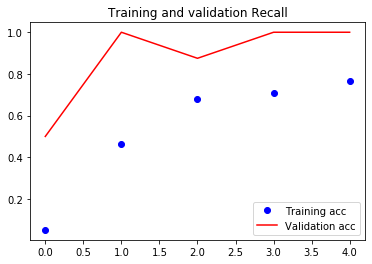

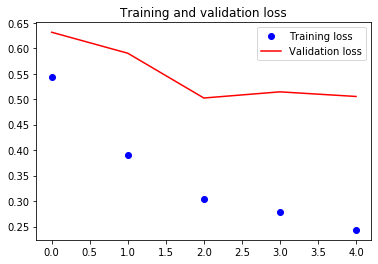

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 

rec = historyA.history['recall']
val_rec = historyA.history['val_recall']
loss = historyA.history['loss']
val_loss = historyA.history['val_loss']
epochs = range(len(rec))
plt.plot(epochs, rec, 'bo', label='Training acc')
plt.plot(epochs, val_rec, 'r', label='Validation acc')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Model B

In [83]:
modelB = models.Sequential()

modelB.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
modelB.add(layers.MaxPooling2D((3, 3)))
modelB.add(layers.Dropout(0.75))  

modelB.add(layers.Conv2D(12, (3, 3), activation='relu'))
modelB.add(layers.MaxPooling2D((3, 3)))
modelB.add(layers.Dropout(0.05))  

# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(256, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

modelB.add(layers.Flatten())
#model.add(layers.Dense(512, activation='relu'))
modelB.add(layers.Dense(1, activation='sigmoid'))

In [91]:
modelB.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras_metrics.recall()])

historyB = modelB.fit(train_images,
                    train_y,
                    epochs=5,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=1)

Train on 5216 samples, validate on 16 samples
Epoch 1/5
5216/5216 [==============================] - 10s 2ms/step - loss: 0.1281 - acc: 0.9528 - recall: 0.8978 - val_loss: 0.5719 - val_acc: 0.6875 - val_recall: 0.3750
Epoch 2/5
5216/5216 [==============================] - 15s 3ms/step - loss: 0.1219 - acc: 0.9507 - recall: 0.8956 - val_loss: 0.6199 - val_acc: 0.6250 - val_recall: 0.2500
Epoch 3/5
5216/5216 [==============================] - 19s 4ms/step - loss: 0.1195 - acc: 0.9528 - recall: 0.9068 - val_loss: 0.8257 - val_acc: 0.6250 - val_recall: 0.2500
Epoch 4/5
5216/5216 [==============================] - 19s 4ms/step - loss: 0.1214 - acc: 0.9511 - recall: 0.8956 - val_loss: 0.6097 - val_acc: 0.6250 - val_recall: 0.2500
Epoch 5/5
5216/5216 [==============================] - 26s 5ms/step - loss: 0.1216 - acc: 0.9534 - recall: 0.9045 - val_loss: 0.8530 - val_acc: 0.6250 - val_recall: 0.2500


In [92]:
results_train = modelB.evaluate(train_images, train_y)

5216/5216 [==============================] - 13s 2ms/step


In [93]:
results_test = modelB.evaluate(val_images, val_y)

16/16 [==============================] - 0s 3ms/step


In [94]:
results_train

[0.11244613892095952, 0.9662576687116564, 0.8993288589933386]

In [95]:
results_test

[0.8529567718505859, 0.625, 0.249999996875]

In [96]:
results_test

[0.8529567718505859, 0.625, 0.249999996875]

In [90]:
modelB.predict_classes(val_images)

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

rec = historyB.history['recall']
val_rec = historyB.history['val_recall']
loss = historyB.history['loss']
val_loss = historyB.history['val_loss']
epochs = range(len(rec))
plt.plot(epochs, rec, 'bo', label='Training acc')
plt.plot(epochs, val_rec, 'r', label='Validation acc')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Model C

In [27]:


modelC = DenseNet(input_shape=(28,28,1), nb_classes=10, depth=10, growth_rate=25,dropout_rate=0.1, bottleneck=False, compression=0.5).build_model()

# modelC.add(layers.Conv2D(6, (3, 3), activation='relu',
#                         input_shape=(64 ,64,  3)))
# modelC.add(layers.MaxPooling2D((3, 3), strides=3))
# modelC.add(layers.Dropout(0.75))  

# modelC.add(layers.Conv2D(12, (3, 3), activation='relu'))
# modelC.add(layers.MaxPooling2D((3, 3), strides=3))
# modelC.add(layers.Dropout(0.05))  

# modelC.add(layers.Conv2D(18, (3, 3), activation='relu'))
# modelC.add(layers.MaxPooling2D((3, 3), strides=3))
# modelC.add(layers.Dropout(0.0025)) 

# modelC.add(layers.Flatten())
# #model.add(layers.Dense(512, activation='relu'))
# modelC.add(layers.Dense(1, activation='sigmoid'))


# confusion matrx

TypeError: __init__() got an unexpected keyword argument 'input_shape'

In [ ]:
modelC.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc',keras_metrics.recall()])

historyC = model.fit(train_images,
                    train_y,
                    epochs=7,
                    batch_size=32,
                    validation_data=(val_images, val_y),
                    verbose=1)

In [ ]:
results_train = modelC.evaluate(train_images, train_y)

In [ ]:
results_test = modelC.evaluate(val_images, val_y)

In [ ]:
results_train

In [ ]:
results_test

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

rec = historyC.history['recall']
val_rec = historyC.history['val_recall']
loss = historyC.history['loss']
val_loss = historyC.history['val_loss']
epochs = range(len(rec))
plt.plot(epochs, rec, 'bo', label='Training acc')
plt.plot(epochs, val_rec, 'r', label='Validation acc')
plt.title('Training and validation Recall')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()